# Clustering con K-means

[Curso de Clustering con Python y scikit-learn](https://platzi.com/cursos/clustering)

## Importar librerías

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

## Preparando datos de prueba

In [13]:
X, y, c = make_blobs(500, cluster_std=0.8, centers=4, n_features=2, return_centers=True)

In [14]:
df_bloobs = pd.DataFrame({
    'x1':X[:,0],
    'x2':X[:,1],
    'Y':y,
})

In [17]:
df_centers = pd.DataFrame(
    {
        'x1':c[:,0],
        'x2':c[:,1],
    }
)

## Visualización de datos

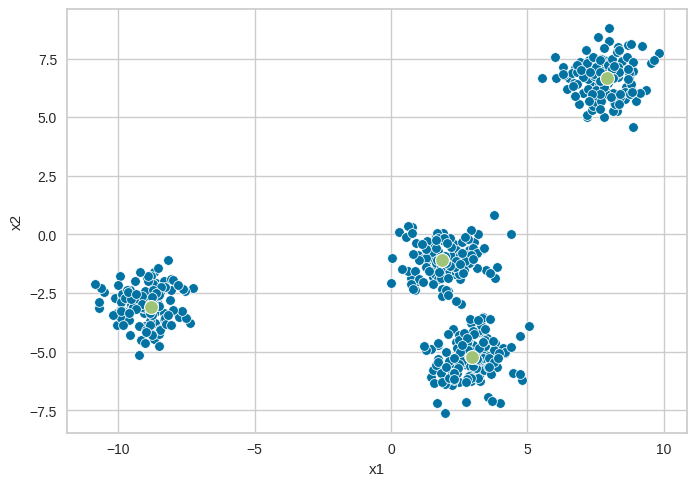

In [24]:
sns.scatterplot(data=df_bloobs, x='x1', y='x2')
sns.scatterplot(data=df_centers, x='x1', y='x2', markers='X', s=100)
plt.show()

## Aplicando K-means

In [35]:
kmeans = KMeans(n_clusters=4)
df_cluster = kmeans.fit_predict(X)
df_bloobs['cluster'] = df_cluster
k_means_centers = kmeans.cluster_centers_
df_k_means_center = pd.DataFrame({
    'x1':k_means_centers[:,0],
    'x2':k_means_centers[:,1],
})

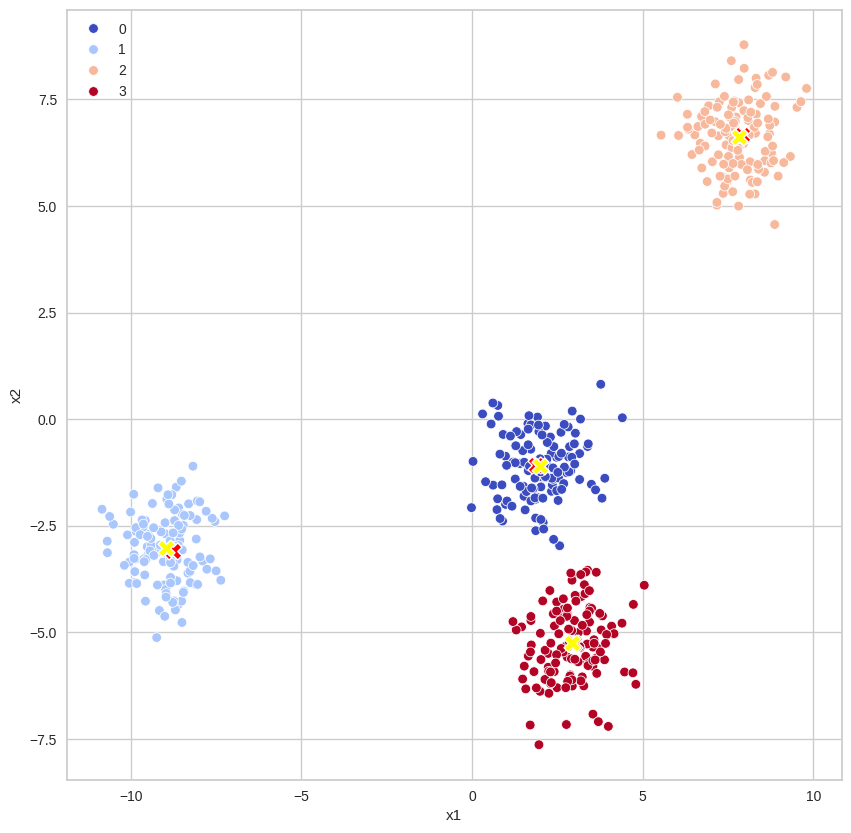

In [37]:
fig = plt.figure(figsize=(10,10))
sns.scatterplot(data=df_bloobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
sns.scatterplot(data=df_centers, x='x1', y='x2', color='red', marker='X', s=150)
sns.scatterplot(data=df_k_means_center, x='x1', y='x2', color='yellow', marker='X', s=150)
plt.show()

In [39]:
def vis_cluster (k):
  kmeans = KMeans(n_clusters=k)
  df_cluster = kmeans.fit_predict(X)
  df_bloobs['cluster'] = df_cluster
  k_means_centers = kmeans.cluster_centers_
  df_k_means_center = pd.DataFrame({
      'x1':k_means_centers[:,0],
      'x2':k_means_centers[:,1],
  })
  fig = plt.figure(figsize=(10,10))
  sns.scatterplot(data=df_bloobs, x='x1', y='x2', hue='cluster', palette='coolwarm')
  sns.scatterplot(data=df_centers, x='x1', y='x2', color='red', marker='X', s=150)
  sns.scatterplot(data=df_k_means_center, x='x1', y='x2', color='yellow', marker='X', s=150)
  plt.show()

3


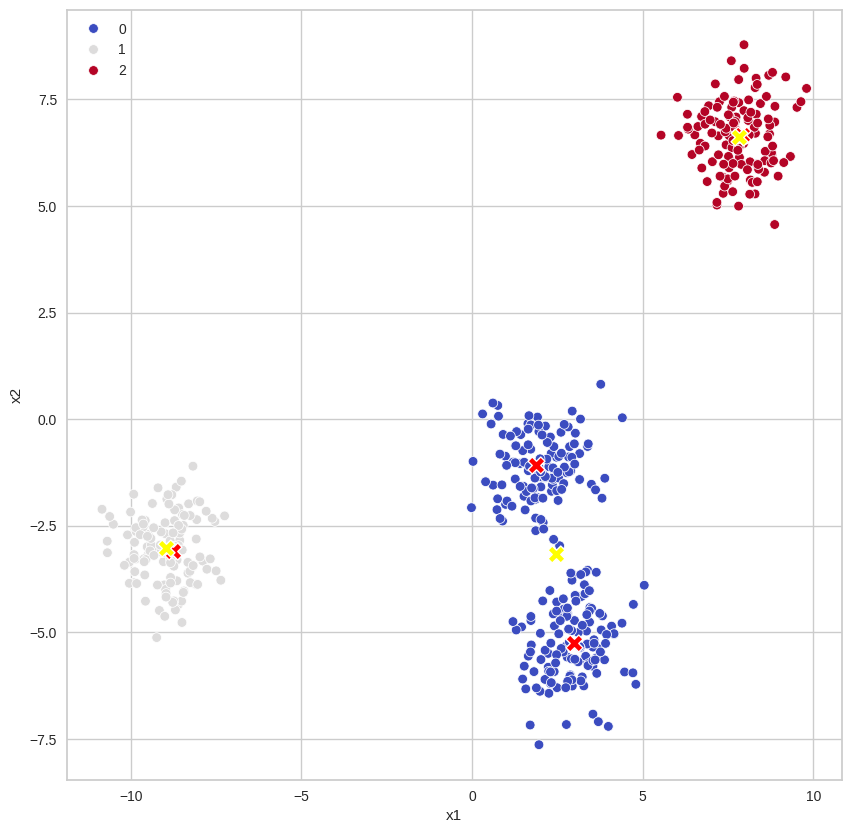

4


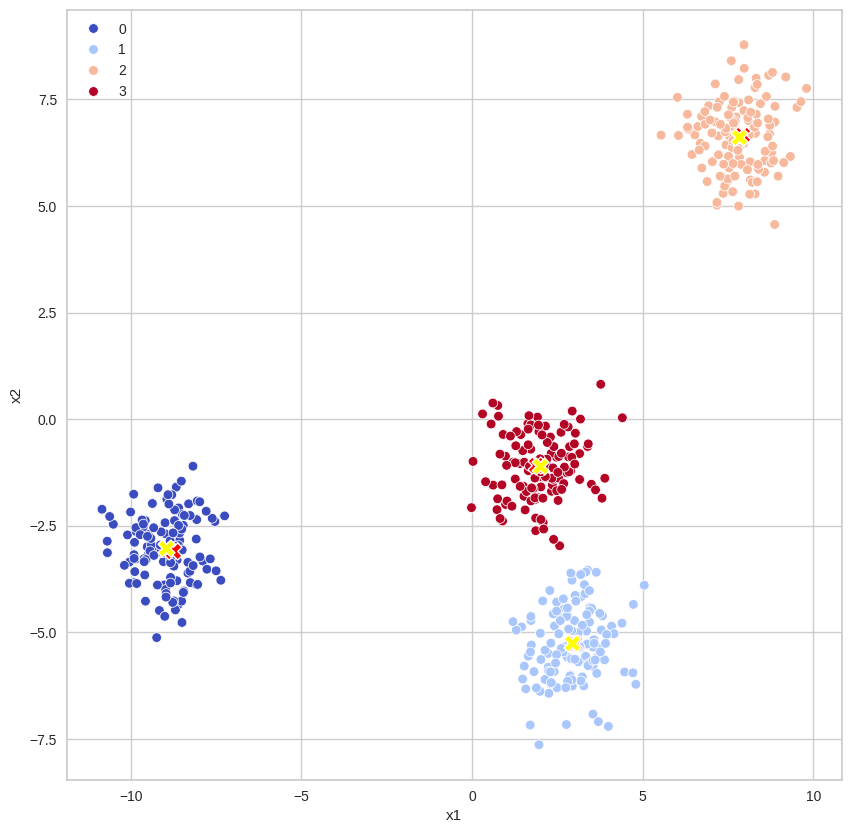

5


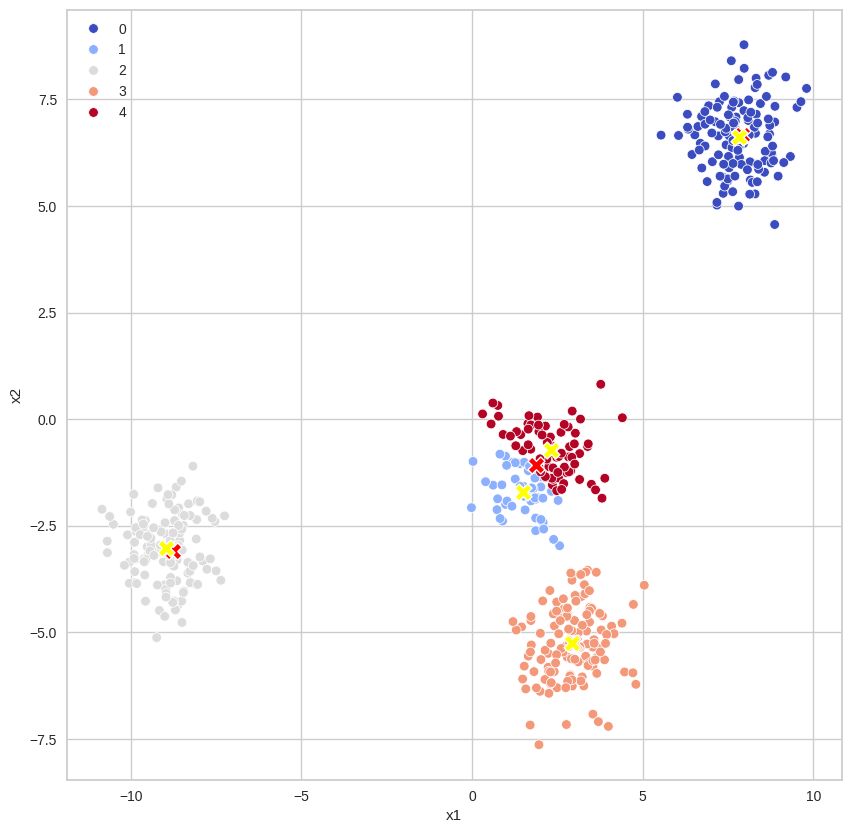

6


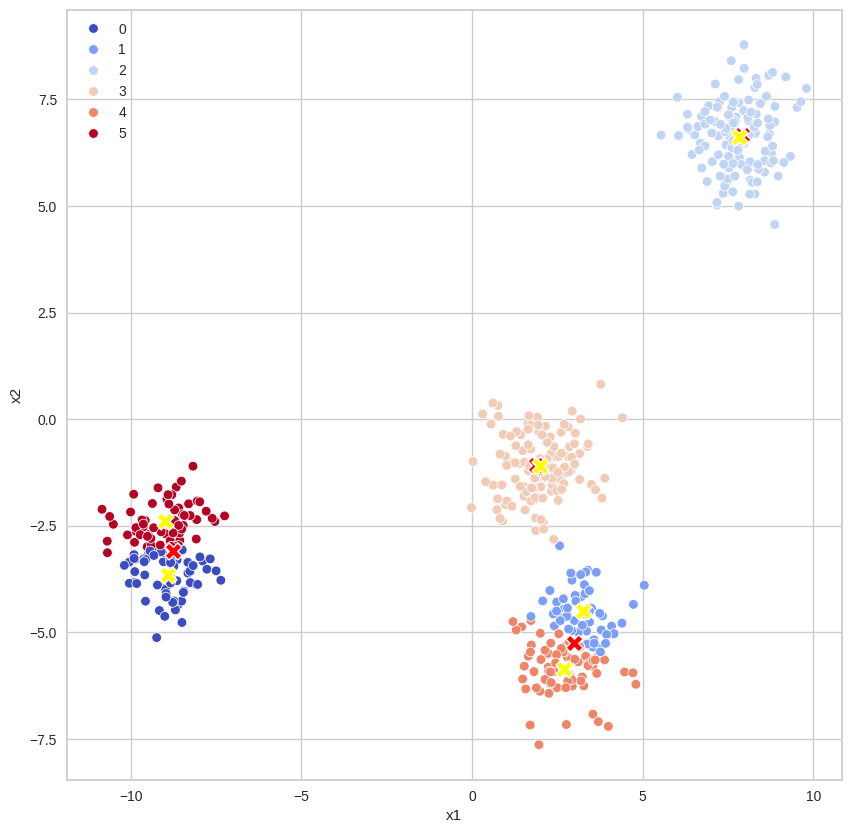

In [40]:
for _ in range(3,7):
  print(_)
  vis_cluster(_)

## Encontrando el valor de K

Text(0, 0.5, 'Inertia - (SumSqr)')

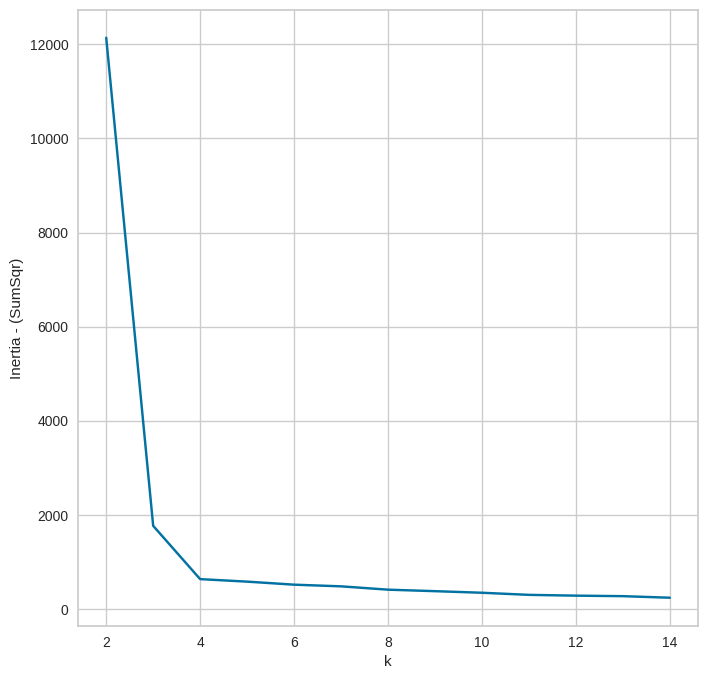

In [43]:
sum_of_squared_distance = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(X)
  sum_of_squared_distance.append(km.inertia_)

plt.figure(figsize=(8,8))
plt.plot(K, sum_of_squared_distance, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia - (SumSqr)')

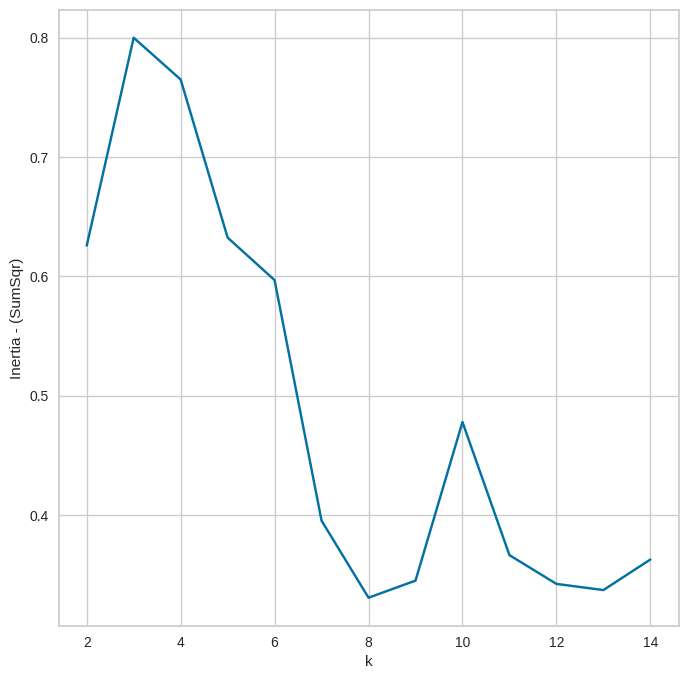

In [49]:
silhouette_scores = []
K = range(2,15)
for k in K:
  km = KMeans(n_clusters=k)
  km = km.fit(X)
  y = km.predict(X)
  silhouette_scores.append(silhouette_score(X,y))

plt.figure(figsize=(8,8))
plt.plot(K, silhouette_scores, 'bx-')
plt.xlabel('k')
plt.ylabel('Inertia - (SumSqr)')
plt.show()

#silhouette_scores = [silhouette_score(X, KMeans(n_clusters=k).fit(X).labels_) for k in range(2,15)]

## Evaluando clusters con K-means

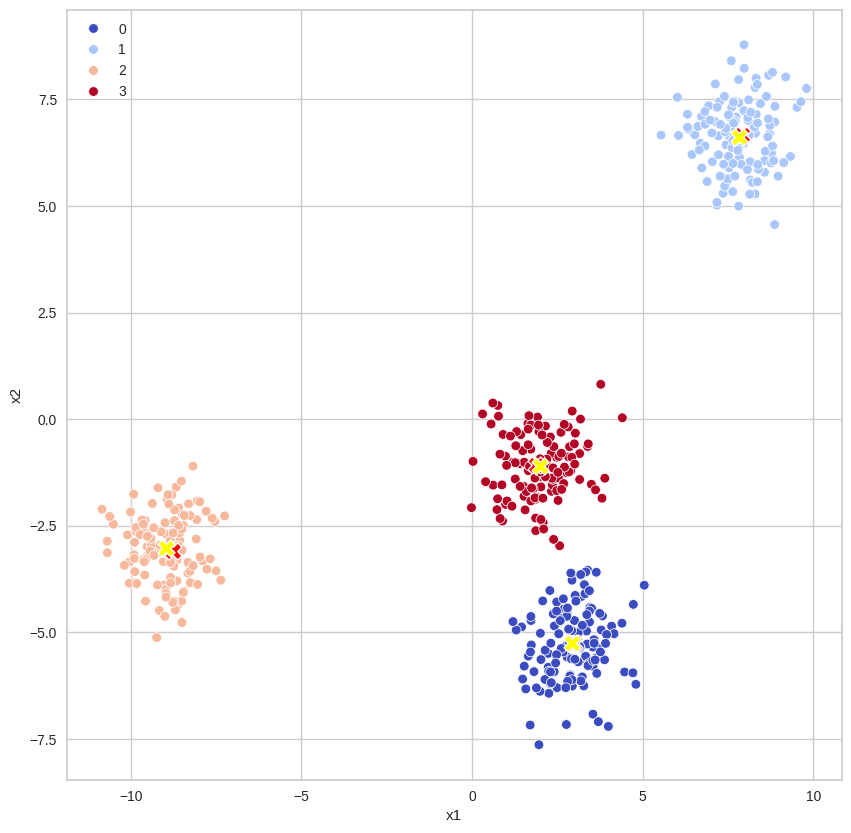

In [51]:
vis_cluster(4)

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=4))

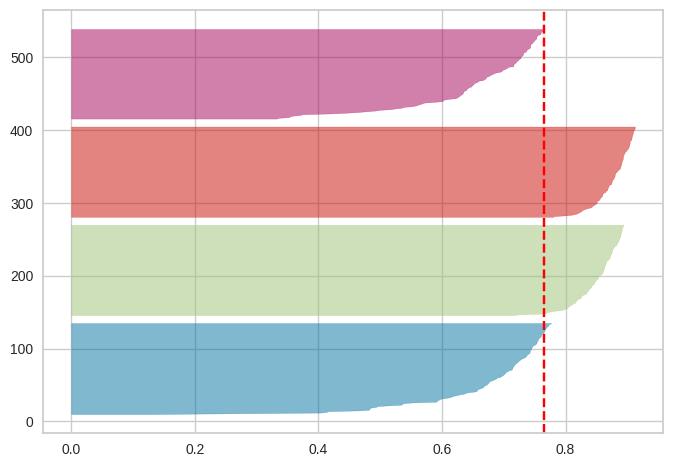

In [54]:
km = KMeans(n_clusters=4)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)

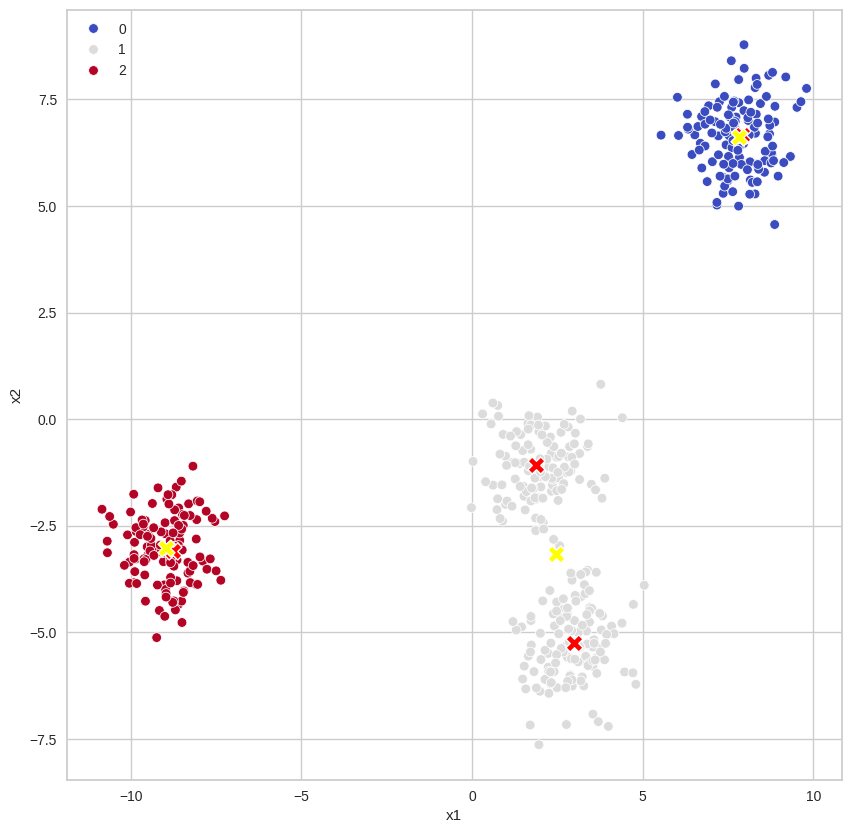

In [52]:
vis_cluster(3)

SilhouetteVisualizer(ax=<Axes: >, colors='yellowbrick',
                     estimator=KMeans(n_clusters=3))

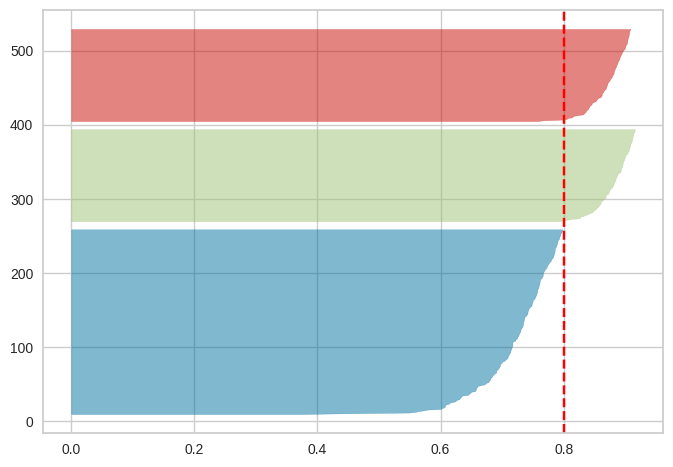

In [55]:
km = KMeans(n_clusters=3)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')
visualizer.fit(X)